<a href="https://colab.research.google.com/github/AntonyBoza/MACHINE-LEARNING/blob/master/Imputing_missing_values_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
churn_master_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv')

In [0]:
churn_df = churn_master_df.copy()

In [5]:
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [0]:
# Checking for columns types and count of registers

In [7]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7032 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [0]:
# Checking which columns have missing values (Here, it will be clear that we must imput values to "TotalCharges" column)

In [9]:
churn_df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
print("Rows     : ", churn_df.shape[0])
print("Columns     : ", churn_df.shape[1])
print("\nFeatures     : \n", churn_df.columns.tolist())
print("\nMissing values     : ", churn_df.isnull().any())
print("\nUnique values     : \n", churn_df.nunique())

Rows     :  7043
Columns     :  10

Features     : 
 ['customerID', 'gender', 'SeniorCitizen', 'tenure', 'ServiceCount', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values     :  customerID          False
gender              False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

Unique values     : 
 customerID          7043
gender                 2
SeniorCitizen          2
tenure                73
ServiceCount           9
Contract               3
PaperlessBilling       2
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64


In [11]:
churn_df[churn_df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
3331,7644-OMVMY,Male,0,0,7,Two year,No,19.85,NaN,No
3826,3213-VVOLG,Male,0,0,8,Two year,No,25.35,NaN,No
4380,2520-SGTTA,Female,0,0,7,Two year,No,20.00,NaN,No
5218,2923-ARZLG,Male,0,0,7,One year,Yes,19.70,NaN,No
6670,4075-WKNIU,Female,0,0,7,Two year,No,73.35,NaN,No


In [12]:
churn_df[churn_df['tenure'] == 0]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
3331,7644-OMVMY,Male,0,0,7,Two year,No,19.85,NaN,No
3826,3213-VVOLG,Male,0,0,8,Two year,No,25.35,NaN,No
4380,2520-SGTTA,Female,0,0,7,Two year,No,20.00,NaN,No
5218,2923-ARZLG,Male,0,0,7,One year,Yes,19.70,NaN,No
6670,4075-WKNIU,Female,0,0,7,Two year,No,73.35,NaN,No


In [13]:
churn_df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [14]:
churn_df[churn_df['Churn']=='No'].describe()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000,5174.000000,5163.000000
mean,0.128721,37.569965,5.811751,61.265124,2555.344141
std,0.334923,24.113777,1.890418,31.092648,2329.456984
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,15.000000,4.000000,25.100000,577.825000
50%,0.000000,38.000000,6.000000,64.425000,1683.600000
75%,0.000000,61.000000,7.000000,88.400000,4264.125000
max,1.000000,72.000000,9.000000,118.750000,8672.450000


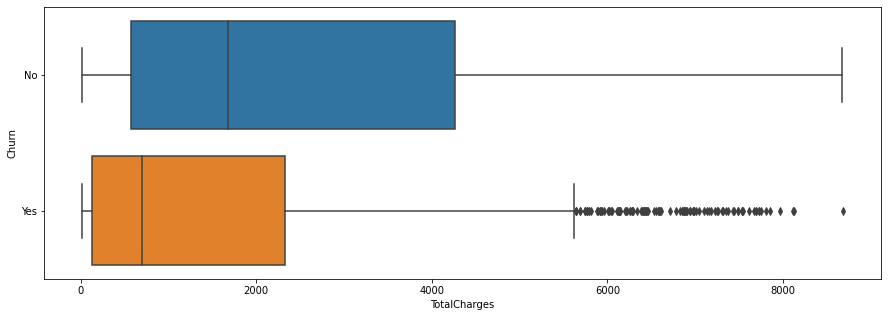

In [15]:
plt.figure(figsize=(15,5))
sns.boxplot(x="TotalCharges", y="Churn", data=churn_df)

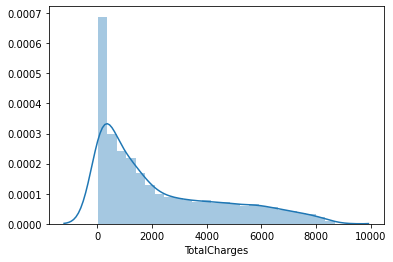

In [16]:
sns.distplot(churn_df['TotalCharges'], hist=True)

In [0]:
# Let's apply a function to all the column 'TotalCharges' to get a better distribution

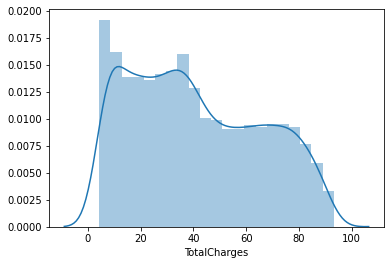

In [18]:
sns.distplot(churn_df['TotalCharges'].apply(np.sqrt), hist=True)

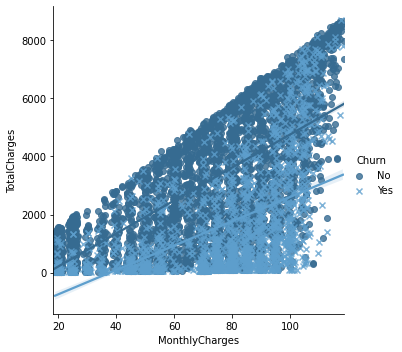

In [19]:
sns.lmplot(x="MonthlyCharges", y="TotalCharges", data=churn_df, fit_reg=True, hue="Churn", markers=["o", "x"], palette="Blues_d")

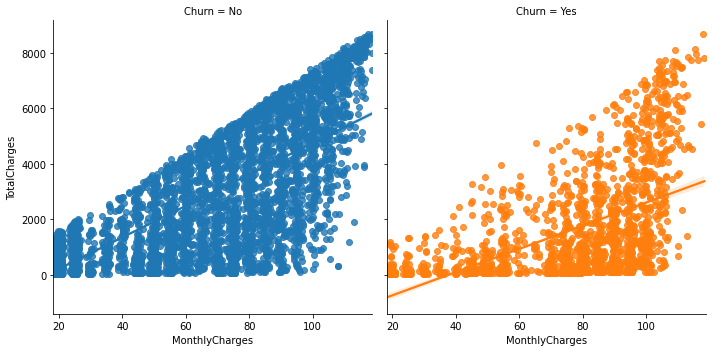

In [20]:
sns.lmplot(x="MonthlyCharges", y="TotalCharges", data=churn_df, fit_reg=True, col="Churn", hue="Churn")

Le's change the color of the line to vizualize it better

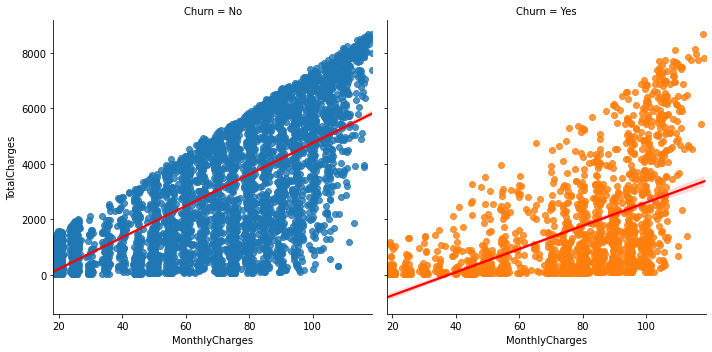

In [21]:
sns.lmplot(x="MonthlyCharges", y="TotalCharges", data=churn_df, fit_reg=True, col="Churn", hue="Churn", line_kws={'color':'red'})

Let's check how strong is the correlation

In [22]:
churn_df[['TotalCharges', 'MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.000000,0.651065
MonthlyCharges,0.651065,1.000000


Checking the same correlation but for the case when Churn == No

In [23]:
churn_df[churn_df['Churn']=='No'][['TotalCharges', 'MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.00000,0.75711
MonthlyCharges,0.75711,1.00000


Let's create a new dataframe just with Churn "No"

In [0]:
churn_no_df = churn_df[(churn_df['Churn']=='No') & (churn_df['TotalCharges'].isna()==False)]


Checking that there is no missing value in the new dataframe

In [25]:
churn_no_df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [26]:
churn_no_df.shape[0]


5163

In [27]:
churn_no_df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [0]:
from scipy import stats
slope, intercept, r_value, p_value, std_err=stats.linregress(churn_no_df['MonthlyCharges'], churn_no_df['TotalCharges'])

In [29]:
print("slope          : ", slope)
print("intercept      : ", intercept)
print("r_value        : ", r_value)
print("p_value        : ", p_value)
print("std_err        : ", std_err)
print("R_squared        : ", r_value**2)


slope          :  56.719089515043095
intercept      :  -921.9562487042454
r_value        :  0.7571099054701252
p_value        :  0.0
std_err        :  0.681251950036741
R_squared        :  0.573215408960982


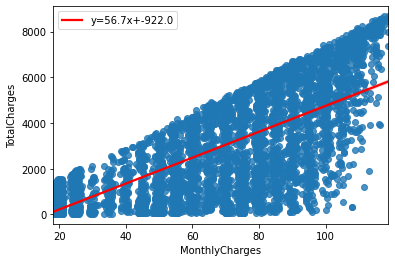

In [30]:
ax=sns.regplot(x='MonthlyCharges', y='TotalCharges', data=churn_no_df, line_kws={'color':'red', 'label': 'y={0:.1f}x+{1:.1f}'.format(slope,intercept)})
ax.legend(loc='best')


Since we got a very low value for R_squared = 0.57, and high std_err = 0.68, let's check what we would get using instead the "tenure" column.

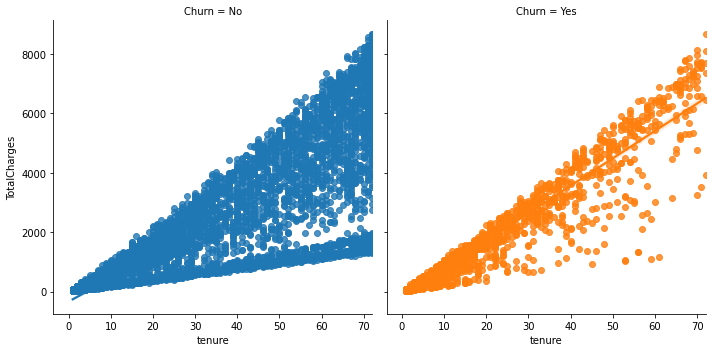

In [31]:
sns.lmplot(x="tenure", y="TotalCharges", data=churn_df, fit_reg=True, col="Churn", hue="Churn")

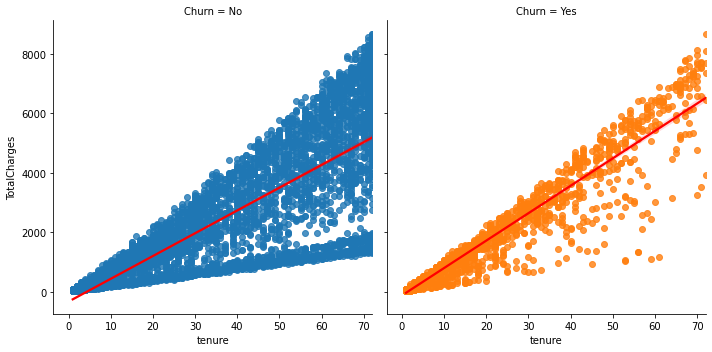

In [32]:
sns.lmplot(x="tenure", y="TotalCharges", data=churn_df, fit_reg=True, col="Churn", hue="Churn", line_kws={'color':'red'})

In [33]:
churn_df[['TotalCharges', 'tenure']].corr()

,TotalCharges,tenure
TotalCharges,1.00000,0.82588
tenure,0.82588,1.00000


We see that there is a more strong correlation using "tenure".

In [34]:
churn_df[churn_df['Churn']=='No'][['TotalCharges', 'tenure']].corr()

,TotalCharges,tenure
TotalCharges,1.000000,0.793176
tenure,0.793176,1.000000


In [0]:
slope, intercept, r_value, p_value, std_err=stats.linregress(churn_no_df['tenure'], churn_no_df['TotalCharges'])

In [36]:
print("slope          : ", slope)
print("intercept      : ", intercept)
print("r_value        : ", r_value)
print("p_value        : ", p_value)
print("std_err        : ", std_err)
print("R_squared        : ", r_value**2)

slope          :  76.74016671293452
intercept      :  -333.9238789128808
r_value        :  0.7931755945410734
p_value        :  0.0
std_err        :  0.8201603465121385
R_squared        :  0.6291275237755853


With "tenure" we got better R_squared, but worse std_err. 

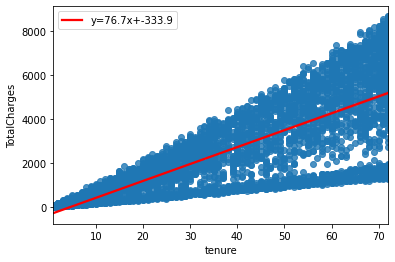

In [37]:
ax=sns.regplot(x='tenure', y='TotalCharges', data=churn_no_df, line_kws={'color':'red', 'label': 'y={0:.1f}x+{1:.1f}'.format(slope,intercept)})
ax.legend(loc='best')

As we can see, it still is not the best model that we can get. So, let's try with a little of Feature Engineering, creating a new one feature. Let's use both, "tenure" and "MonthlyCharges" combined into a single feature.

In [38]:
# Create a new column
churn_no_df['tenure_charges']=churn_no_df['tenure']*churn_no_df['MonthlyCharges']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
churn_no_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenure_charges
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No,1936.30
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No,1903.50
6,1452-KIOVK,Male,0,22,5,Month-to-month,Yes,89.10,1949.40,No,1960.20
7,6713-OKOMC,Female,0,10,2,Month-to-month,No,29.75,301.90,No,297.50


Chacking the correlation between the new feature "tenure_charges" and "TotalCharges"

In [40]:
churn_no_df[churn_no_df['Churn']=='No'][['TotalCharges', 'tenure_charges']].corr()

,TotalCharges,tenure_charges
TotalCharges,1.000000,0.999536
tenure_charges,0.999536,1.000000


Now we can see that this correlation is better, so we'll use this new feature to make our Linear Regression.

In [0]:
slope, intercept, r_value, p_value, std_err=stats.linregress(churn_no_df['tenure_charges'], churn_no_df['TotalCharges'])

In [42]:
print("slope          : ", slope)
print("intercept      : ", intercept)
print("r_value        : ", r_value)
print("p_value        : ", p_value)
print("std_err        : ", std_err)
print("R_squared        : ", r_value**2)

slope          :  1.0002050152353281
intercept      :  -0.3829975740923146
r_value        :  0.9995360895506968
p_value        :  0.0
std_err        :  0.00042423385145342663
R_squared        :  0.9990723943142986


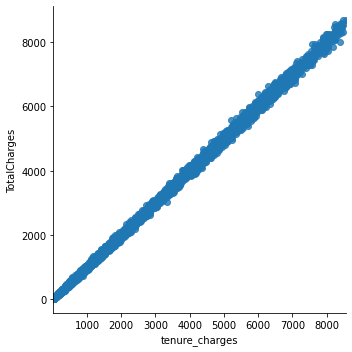

In [43]:
sns.lmplot(x="tenure_charges", y="TotalCharges", data=churn_no_df)

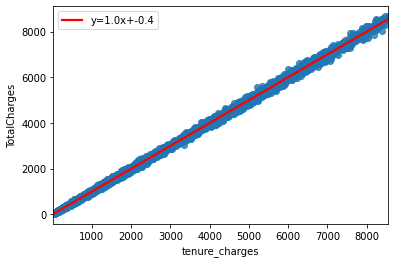

In [44]:
ax=sns.regplot(x='tenure_charges', y='TotalCharges', data=churn_no_df, line_kws={'color':'red', 'label': 'y={0:.1f}x+{1:.1f}'.format(slope,intercept)})
ax.legend(loc='best')

In [0]:
def fillna(tenure, monthlycharge):
  if tenure == 0:
    totcharges = monthlycharge
  else:
    totcharges = tenure * monthlycharge
    totcharges = intercept + (totcharges * slope)
  return round(totcharges,2)

In [0]:
churn_df['TotChargeNew'] = churn_df.apply(lambda x: x['TotalCharges'] if not pd.isna(x['TotalCharges']) else fillna(x['tenure'],x['MonthlyCharges']), axis=1)

In [47]:
churn_df[churn_df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotChargeNew
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No,52.55
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No,20.25
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No,80.85
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No,25.75
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No,56.05
3331,7644-OMVMY,Male,0,0,7,Two year,No,19.85,NaN,No,19.85
3826,3213-VVOLG,Male,0,0,8,Two year,No,25.35,NaN,No,25.35
4380,2520-SGTTA,Female,0,0,7,Two year,No,20.00,NaN,No,20.00
5218,2923-ARZLG,Male,0,0,7,One year,Yes,19.70,NaN,No,19.70
6670,4075-WKNIU,Female,0,0,7,Two year,No,73.35,NaN,No,73.35


In [0]:
churn_actual_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_actual.csv')

In [0]:
churn_merged = pd.merge(churn_df, churn_actual_df)

In [50]:
churn_merged[churn_merged.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotChargeNew,TotChargesAct
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No,52.55,
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No,20.25,
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No,80.85,
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No,25.75,
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No,56.05,
3331,7644-OMVMY,Male,0,0,7,Two year,No,19.85,NaN,No,19.85,
3826,3213-VVOLG,Male,0,0,8,Two year,No,25.35,NaN,No,25.35,
4380,2520-SGTTA,Female,0,0,7,Two year,No,20.00,NaN,No,20.00,
5218,2923-ARZLG,Male,0,0,7,One year,Yes,19.70,NaN,No,19.70,
6670,4075-WKNIU,Female,0,0,7,Two year,No,73.35,NaN,No,73.35,


In [54]:
churn_merged.iloc[699:]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotChargeNew,TotChargesAct
699,8338-QIUNR,Male,0,72,6,Two year,Yes,66.50,4811.60,No,4811.60,4811.6
700,1525-LNLOJ,Male,0,66,5,Two year,Yes,63.30,4189.70,No,4189.70,4189.7
701,9450-TRJUU,Male,0,35,4,Month-to-month,No,83.15,2848.45,No,2848.45,2848.45
702,1766-GKNMI,Male,0,29,4,Month-to-month,Yes,84.90,2516.20,No,2516.20,2516.2
703,6942-LBFDP,Female,0,2,7,Month-to-month,Yes,20.55,33.60,No,33.60,33.6
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,8,One year,Yes,84.80,1990.50,No,1990.50,1990.5
7039,2234-XADUH,Female,0,72,7,One year,Yes,103.20,7362.90,No,7362.90,7362.9
7040,4801-JZAZL,Female,0,11,2,Month-to-month,Yes,29.60,346.45,No,346.45,346.45
7041,8361-LTMKD,Male,1,4,3,Month-to-month,Yes,74.40,306.60,Yes,306.60,306.6
